In [18]:
# Exploratory Data Analysis using the "AWESOME" Framework. 
# Actually it is the OSEMN Framework - just that many others including me pronunced it as "Awe-Some". 
# (1) Obtaining data.
# (2) Srubbing or cleaning the data obtained which is so important as the famous saying goes "gargabe in, garbage out".
# (3) Exploring the data to detect patterns & visualize trends.
# (4) Modelling the data using various machine learning tools so as to lend us some of their predictive powers.
# (5) iNterpreting the data being modelled - explain our models & the results derived to various stakeholders.

In [23]:
# Importing the necessary libraries that i will be using.

import sqlite3 as sql # Using the sqlite3 package to access the database.
import pandas as pd # For data manipulation & analysis.
import numpy as np # To perform quick operations on numerical data.
import seaborn as sns # For data visualization.
import matplotlib.pyplot as plt # For forming useful plots.
# Command that allow us to view matplotlib plots in a Jupyter notebook. 
%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (10,6)

# <font color = red>(1) <font size = 8>O</font>BTAINING DATA according to the <font color = blue><font size = 8>O</font>.S.E.M.N.</font> Framework.</font>

In [92]:
# Making a connection to the database file.
# Assign our data & read sqlite query results into a pandas DataFrame.

db = sql.connect('home_sales.db') 

df1 = pd.read_sql_query('SELECT * FROM sales', db) # Selecting all or everything from the database table named as sales.

# Verifying / Previewing our data to ascertain that it can be loaded properly for subsequent work to be further carried out.

df1.head(10) # To display the first 10 records of the dataframe i called df1. Note : by default will show first 5 only.

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,review_score,basement_size,built,renovation,zipcode,latitude,longitude,living_room_size,lot_size
0,7787980.0,13 October 2014,221900.0,3.0,1.00,1.0,0.0,0.0,fair,10.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6774848.0,09 December 2014,538000.0,3.0,2.25,2.0,0.0,0.0,fair,7.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,6999329.0,25 February 2015,180000.0,2.0,1.00,1.0,0.0,0.0,fair,8.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,7773052.0,09 December 2014,604000.0,4.0,3.00,1.0,0.0,0.0,excellent,6.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,7760818.0,18 February 2015,510000.0,3.0,2.00,1.0,0.0,0.0,fair,6.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
5,7659918.0,12 May 2014,1225000.0,4.0,4.50,1.0,0.0,0.0,fair,8.0,1530.0,2001.0,0.0,98053.0,47.6561,-122.005,4760.0,101930.0
6,8057033.0,27 June 2014,257500.0,3.0,2.25,2.0,0.0,0.0,FAIR,7.0,0.0,1995.0,0.0,98003.0,47.3097,-122.327,2238.0,6819.0
7,7249853.0,15 January 2015,291850.0,3.0,1.50,1.0,0.0,0.0,fair,7.0,0.0,1963.0,0.0,98198.0,47.4095,-122.315,1650.0,9711.0
8,7906980.0,15 April 2015,229500.0,3.0,1.00,1.0,0.0,0.0,FAIR,7.0,730.0,1960.0,0.0,98146.0,47.5123,-122.337,1780.0,8113.0
9,7605289.0,12 March 2015,323000.0,3.0,2.50,2.0,0.0,0.0,fair,7.0,0.0,2003.0,0.0,98038.0,47.3684,-122.031,2390.0,7570.0


# <font color = red>(2) <font size = 8>S</font>CRUBBING / CLEANING DATA according to the <font color = blue>O.<font size = 8>S</font>.E.M.N.</font> Framework.</font> (Also known as PreProcessing to many others)

In [72]:
# Lets start the preprocessing by knowing our newly obtained data a little better.

df1.shape

(23154, 18)

In [73]:
# Great! I now know that there are 23154 records with 18 columns of features relating to these house sales transactions.
# I noticed from the first few lines of records that there are some non-numerical inputs. Let's explore the summary briefly.

df1.info() # To draw a brief summary of the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23154 entries, 0 to 23153
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                21871 non-null  float64
 1   date              21925 non-null  object 
 2   price             21896 non-null  float64
 3   bedrooms          21905 non-null  float64
 4   bathrooms         21938 non-null  float64
 5   floors            21862 non-null  float64
 6   waterfront        21871 non-null  float64
 7   view              21908 non-null  float64
 8   condition         21890 non-null  object 
 9   review_score      21851 non-null  float64
 10  basement_size     21929 non-null  float64
 11  built             21853 non-null  float64
 12  renovation        21897 non-null  float64
 13  zipcode           21884 non-null  float64
 14  latitude          21903 non-null  float64
 15  longitude         21883 non-null  float64
 16  living_room_size  21912 non-null  float6

In [74]:
# Ok, i think i will do something later to the date & condition columns. I noticed many null values! Let's check that again.

df.isna().sum() # This will return the actual total number of NaNs or null values in each column.

id                  1283
date                1229
price               1258
bedrooms            1249
bathrooms           1216
floors              1292
waterfront          1283
view                1246
condition           1264
review_score        1303
basement_size       1225
built               1301
renovation          1257
zipcode             1270
latitude            1251
longitude           1271
living_room_size    1242
lot_size            1222
dtype: int64

In [78]:
# There are many NaN values in our dataset. Dropping the rows that contain NA values would badly shrink our working dataset.
# So, let's begin dealing with the missing/null values which will always be the first steps we take to scrub data clean.
# To begin the process of replacing null values, i will change the condition column from string to numerical inputs.

df1['condition'].unique() # Uniquely identify all the various kinds of house conditions.

array(['fair', 'excellent', 'FAIR', 'good', 'TERRIBLE', 'poor', None,
       'GOOD', 'EXCELLENT', 'terrible', 'POOR'], dtype=object)

In [79]:
df2 = df1.copy() # Retaining df1 as the original dataset before making any changes to the data.

In [83]:
# To change the condition column into numerical values so as to facilitate replacing of null values later with its own mean.

df2['condition'].replace(['fair', 'excellent', 'FAIR', 'good', 'TERRIBLE', 'poor', 
                                'GOOD', 'EXCELLENT', 'terrible', 'POOR'],[3,5,3,4,1,2,4,5,1,2], inplace = True)

df2.head() # To show the first 5 rows of the dataframe i now called df2. Condition column will be changed to numerical values.

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,review_score,basement_size,built,renovation,zipcode,latitude,longitude,living_room_size,lot_size
0,7787980.0,13 October 2014,221900.0,3.0,1.00,1.0,0.0,0.0,3.0,10.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6774848.0,09 December 2014,538000.0,3.0,2.25,2.0,0.0,0.0,3.0,7.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,6999329.0,25 February 2015,180000.0,2.0,1.00,1.0,0.0,0.0,3.0,8.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,7773052.0,09 December 2014,604000.0,4.0,3.00,1.0,0.0,0.0,5.0,6.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,7760818.0,18 February 2015,510000.0,3.0,2.00,1.0,0.0,0.0,3.0,6.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [84]:
df2['condition'].describe() # This function describes the summary statistics of the data residing inside the condition column.

count    21890.000000
mean         3.408908
std          0.650519
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

In [85]:
df2['condition'].value_counts() # This function will keep track of the count for each type of house conditions.

3.0    14211
4.0     5757
5.0     1716
2.0      174
1.0       32
Name: condition, dtype: int64

In [88]:
df3 = df2.copy() # Securing df2 as the last original dataset before making any further changes to the data.

# Replacing null or NaN values inside condition column with its very own median number.

df3.condition = df3.condition.fillna(value=df3.condition.median())

df3.tail() # To display the last 5 records of the dataframe i now called df3. Note : by default will show bottom 5 only.

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,review_score,basement_size,built,renovation,zipcode,latitude,longitude,living_room_size,lot_size
23149,7681392.0,30 September 2014,455000.0,2.0,1.75,1.0,0.0,0.0,3.0,6.0,0.0,2004.0,0.0,98053.0,47.7171,-122.033,1440.0,4839.0
23150,6990763.0,24 October 2014,239000.0,3.0,1.50,1.0,0.0,0.0,3.0,NaN,430.0,1971.0,0.0,98188.0,47.4239,-122.292,1400.0,11500.0
23151,7261690.0,13 April 2015,179000.0,2.0,1.00,1.0,0.0,0.0,3.0,11.0,0.0,1949.0,0.0,98188.0,47.4488,-122.274,1100.0,8916.0
23152,6844960.0,04 May 2015,450000.0,3.0,1.00,1.5,0.0,0.0,4.0,7.0,0.0,1917.0,0.0,98118.0,47.5620,-122.289,1140.0,3960.0
23153,NaN,12 September 2014,895000.0,4.0,NaN,2.0,NaN,NaN,3.0,7.0,910.0,NaN,0.0,98115.0,47.6727,NaN,1530.0,NaN


In [89]:
df3.isna().sum() # Returns the latest total number of null values in each column. Note : condition column has NO NaN value now.

id                  1283
date                1229
price               1258
bedrooms            1249
bathrooms           1216
floors              1292
waterfront          1283
view                1246
condition              0
review_score        1303
basement_size       1225
built               1301
renovation          1257
zipcode             1270
latitude            1251
longitude           1271
living_room_size    1242
lot_size            1222
dtype: int64

In [90]:
df3.condition.value_counts() # Checking the count shows 23154 being tally. ((14211 + 1264 = 15475) + 5757 + 1716 + 174 + 32).

3.0    15475
4.0     5757
5.0     1716
2.0      174
1.0       32
Name: condition, dtype: int64

In [91]:
df3.info() # All 23154 entries under the condition column is now confirmed as being converted into float datatype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23154 entries, 0 to 23153
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                21871 non-null  float64
 1   date              21925 non-null  object 
 2   price             21896 non-null  float64
 3   bedrooms          21905 non-null  float64
 4   bathrooms         21938 non-null  float64
 5   floors            21862 non-null  float64
 6   waterfront        21871 non-null  float64
 7   view              21908 non-null  float64
 8   condition         23154 non-null  float64
 9   review_score      21851 non-null  float64
 10  basement_size     21929 non-null  float64
 11  built             21853 non-null  float64
 12  renovation        21897 non-null  float64
 13  zipcode           21884 non-null  float64
 14  latitude          21903 non-null  float64
 15  longitude         21883 non-null  float64
 16  living_room_size  21912 non-null  float6

In [116]:
df4 = df3.copy() # Securing df3 as the last original dataset before making any further changes to the data.

In [120]:
# In any legitimate house transactions it is imperative to have proper filing records & they are tagged to unique id numbers. 
# Also, it is impossible to replace real id by using mean nor median nor ffill nor bfill because every id is unique.
# I'm going to drop entries that do not have proper id numbers as they can be deemed as improperly submitted transactions.

df4.dropna(subset=['id'], inplace=True)

In [122]:
df4.isna().sum() # Returns the latest total number of NaNs in each column. Note : most columns have much lesser NaNs now.

id                     0
date                 552
price                582
bedrooms             596
bathrooms            570
floors               585
waterfront           590
view                 570
condition              0
review_score        1236
basement_size        569
built                619
renovation           585
zipcode              571
latitude             574
longitude            597
living_room_size     561
lot_size             539
dtype: int64

In [123]:
# In any legal official property transactions it is only logical to state the actual sold prices or transacted prices. 
# Afterall, what we are trying to attempt here is utilising other similar property's sold pricings to predict possible prices. 
# Henceforth, I'm going to drop entries that did not submit or file for their sold pricies.

df4.dropna(subset=['price'], inplace=True)

In [125]:
df4.isna().sum() # Returns the latest total number of NaNs in each column. Most columns have now halved the number of NaNs.

id                     0
date                 244
price                  0
bedrooms             259
bathrooms            254
floors               256
waterfront           269
view                 245
condition              0
review_score        1200
basement_size        252
built                286
renovation           251
zipcode              245
latitude             247
longitude            260
living_room_size     255
lot_size             240
dtype: int64

In [126]:
df4.shape

(21289, 18)

In [127]:
df5 = df4.copy() # Securing df4 as the last original dataset before any further workings on the data.

In [128]:
# As said at the start i will be dealing with both the condition column & the date column. 
# I am dropping the id and date columns as i believe these 2 columns are not going to be effective in our modelling later.
# Afterall, the property firm will not be asking their clients what id & date preferences in picking their ideal house to buy.

df5 = df4.drop(['id','date'], axis='columns')
df5.shape

(21289, 16)

In [129]:
# Let's continue to deal with the Null values. Next on the list will be the bedrooms column.

df5.bedrooms.describe() # This fuction gives us summary statistics for the bedrooms column.

count    21030.000000
mean         3.370281
std          0.906322
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64

In [130]:
df5['bedrooms'].unique() # Uniquely show all the various bedrooms types. Notice the max is 11 bedrooms? Need to investigate.

array([ 3.,  2.,  4.,  5., nan,  6.,  1.,  7.,  0.,  8.,  9., 11., 10.])

In [171]:
df5.bedrooms.value_counts() # Show popularity level of bedrooms types. Note : there might be outliers with so many bedrooms.

3.0     9565
4.0     6709
2.0     2678
5.0     1562
6.0      253
1.0      190
7.0       41
8.0       11
0.0       11
9.0        5
10.0       3
11.0       2
Name: bedrooms, dtype: int64

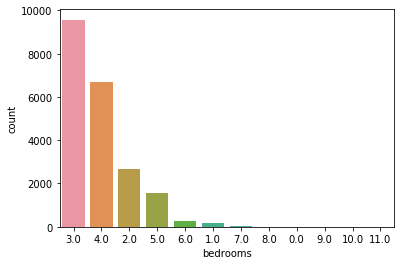

In [172]:
sns.countplot(df5.bedrooms,order=df5['bedrooms'].value_counts().index) # Graphical countplot representation is nice to look at.

In [160]:
# let's examine the top few highest numbers of bedrooms types starting from the 11 bedrooms type in descending order.

df5.bedrooms.sort_values(ascending = False).head(10) # This allow us to pin-point exactly where are the top 10 outliers.

8757     11.0
22641    11.0
15161    10.0
19254    10.0
13314    10.0
4235      9.0
4096      9.0
16844     9.0
8546      9.0
18443     9.0
Name: bedrooms, dtype: float64

In [159]:
print(df5.loc[[8757]]) # Let's zoom in to examine the first 5 entries that claimed to possess 11 and 10 bedrooms respectively.
print(df5.loc[[22641]])
print(df5.loc[[15161]])
print(df5.loc[[19254]])
print(df5.loc[[13314]])

         price  bedrooms  bathrooms  floors  waterfront  view  condition  \
8757  520000.0      11.0        3.0     2.0         0.0   0.0        3.0   

      review_score  basement_size   built  renovation  zipcode  latitude  \
8757          10.0          600.0  1918.0      1999.0  98106.0    47.556   

      longitude  living_room_size  lot_size  
8757   -122.363            1420.0    4960.0  
          price  bedrooms  bathrooms  floors  waterfront  view  condition  \
22641  520000.0      11.0        3.0     2.0         0.0   0.0        3.0   

       review_score  basement_size   built  renovation  zipcode  latitude  \
22641           NaN          600.0  1918.0      1999.0  98106.0    47.556   

       longitude  living_room_size  lot_size  
22641   -122.363            1420.0    4960.0  
          price  bedrooms  bathrooms  floors  waterfront  view  condition  \
15161  650000.0      10.0        2.0     2.0         0.0   0.0        4.0   

       review_score  basement_size   built 

In [173]:
# Entries 8757 & 22641 seemed to be the same house. However, the review_score is different being 1 is NaN while the other a 10.
# While the 10 bedrooms houses seemed not too impossible to be true, their number of bathrooms seemed too litle or in decimal.

# let's also examine all the zero numbers of bedrooms types which is kind of strange to me why big houses has no bedrooms.

df5.bedrooms.sort_values(ascending = True).head(11) # This pin-point exactly where are all the 11 zero bedrooms outliers.

3119     0.0
4868     0.0
6994     0.0
9773     0.0
3467     0.0
19452    0.0
9854     0.0
12653    0.0
14423    0.0
875      0.0
18379    0.0
Name: bedrooms, dtype: float64

In [164]:
print(df5.loc[[3119]]) # Let's zoom in to examine the first 5 entries that claimed to have zero bedrooms in their big houses.
print(df5.loc[[4868]])
print(df5.loc[[6994]])
print(df5.loc[[9773]])
print(df5.loc[[3467]])

         price  bedrooms  bathrooms  floors  waterfront  view  condition  \
3119  380000.0       0.0        0.0     3.0         0.0   2.0        3.0   

      review_score  basement_size   built  renovation  zipcode  latitude  \
3119           8.0            0.0  2006.0         0.0  98133.0   47.7145   

      longitude  living_room_size  lot_size  
3119   -122.356            1470.0    1399.0  
         price  bedrooms  bathrooms  floors  waterfront  view  condition  \
4868  228000.0       0.0        1.0     1.0         0.0   0.0        2.0   

      review_score  basement_size   built  renovation  zipcode  latitude  \
4868           7.0            0.0  1953.0         0.0  98118.0    47.526   

      longitude  living_room_size  lot_size  
4868   -122.261            2170.0    6000.0  
          price  bedrooms  bathrooms  floors  waterfront  view  condition  \
6994  1295650.0       0.0        0.0     2.0         0.0   0.0        3.0   

      review_score  basement_size   built  renova

In [165]:
# Entries 3119, 6994 and 9773 all claimed to have no bathrooms too. Seemed strange to me why a house has no bathrooms.
# Entry 4868 has a lot_size of 6000. A very big land size since it is on one single floor yet come with no bedroom at all.
# Entry 3467 has 1.5 bathroom. How to have a half size bathroom? 
# Entry 3467 also has a lot_size of 1650 with 3 floors meaning each floor about >600, how to have a living_room_size = 1430?
# As such, i will be removing all the 0, 1 as well as 7, 8, 9, 10 & 11 bedrooms entries as i believe they are outliers.

df6 = df5.copy() # Securing df5 as the latest original dataset removing the bedrooms outliers entries.

In [166]:
df6 = df6[df6.bedrooms <= 6] # Removing all the 7, 8, 9, 10 & 11 bedrooms entries as i believe they are outliers.

In [167]:
df6 = df6[df6.bedrooms >= 2] # Removing all the 0 & 1 bedrooms entries as i believe they are also outliers.

In [174]:
df6['bedrooms'].unique() # To confirm i had removed outliers for 0, 1 as well as 7, 8, 9, 10 & 11 bedrooms entries.

array([3., 2., 4., 5., 6.])

In [175]:
df6.bedrooms.value_counts() 

3.0    9565
4.0    6709
2.0    2678
5.0    1562
6.0     253
Name: bedrooms, dtype: int64

In [176]:
df6.isna().sum() # To confirm bedrooms column is cleared from NaNs / Null / NA values.

price                  0
bedrooms               0
bathrooms            102
floors               107
waterfront           110
view                  91
condition              0
review_score        1173
basement_size        101
built                108
renovation            96
zipcode               96
latitude             101
longitude            106
living_room_size     100
lot_size              97
dtype: int64

In [177]:
df6.shape # The latest total number of entries with 16 columns / features.

(20767, 16)

In [178]:
# Next on the list to replace NaNs is the bathrooms column.

df6['bathrooms'].unique() # Uniquely show all the various bathrooms types. Notice the max is 8 bathrooms? Need to investigate.

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
        nan, 3.5 , 4.75, 5.  , 4.25, 3.75, 0.75, 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 5.75, 8.  , 6.75, 7.75, 6.25, 6.5 ])

In [179]:
df6.bathrooms.value_counts() # Show popularity level of bathrooms types. Note : There may be outliers. Why so many bathrooms?

2.50    5189
1.00    3606
1.75    2933
2.25    1994
2.00    1872
1.50    1396
2.75    1146
3.00     707
3.50     702
3.25     566
3.75     145
4.00     120
4.50      89
4.25      74
0.75      44
5.00      17
4.75      17
5.25      12
5.50      10
1.25       7
6.00       5
5.75       4
0.50       3
6.25       2
6.50       2
8.00       1
7.75       1
6.75       1
Name: bathrooms, dtype: int64

In [181]:
df6.bathrooms = df6.bathrooms.fillna(value=df6.bathrooms.median()) # Replacing all NaNs with the bathrooms column's own median.

In [182]:
df6['bathrooms'].unique() # To confirm, after replacing with its own median, there is NO more NaNs in the bathrooms column.

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 4.75, 5.  , 4.25, 3.75, 0.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       5.75, 8.  , 6.75, 7.75, 6.25, 6.5 ])

In [183]:
df6.bathrooms.value_counts() # Note : all NaNs were replaced by its own median at 2.25 (up from 1994 entries to 2096 entries).

2.50    5189
1.00    3606
1.75    2933
2.25    2096
2.00    1872
1.50    1396
2.75    1146
3.00     707
3.50     702
3.25     566
3.75     145
4.00     120
4.50      89
4.25      74
0.75      44
5.00      17
4.75      17
5.25      12
5.50      10
1.25       7
6.00       5
5.75       4
0.50       3
6.25       2
6.50       2
8.00       1
7.75       1
6.75       1
Name: bathrooms, dtype: int64

In [187]:
df6['bathrooms'] = df6['bathrooms'].astype("int") # Converting float to integer as bathrooms values shouldn't have decimals.

In [191]:
df6.dtypes # To check the datatypes in our dataset to verify that our code above had indeed worked.

price               float64
bedrooms            float64
bathrooms             int32
floors              float64
waterfront          float64
view                float64
condition           float64
review_score        float64
basement_size       float64
built               float64
renovation          float64
zipcode             float64
latitude            float64
longitude           float64
living_room_size    float64
lot_size            float64
dtype: object

In [189]:
df6['bathrooms'].unique() # To confirm no more NaNs in the bathrooms column & keeping its uniqueness lean & neat.

array([1, 2, 3, 4, 5, 0, 6, 8, 7])

In [190]:
df6.bathrooms.value_counts() # Note : all NaNs had been replaced by its own median & we can identify the outliers easily.

2    10303
1     7942
3     2120
4      300
0       47
5       43
6       10
8        1
7        1
Name: bathrooms, dtype: int64

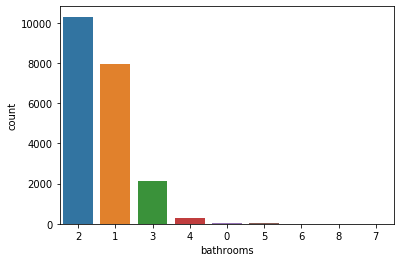

In [192]:
sns.countplot(df6.bathrooms,order=df6['bathrooms'].value_counts().index) # Graphical countplot representation appeals better.

In [195]:
df6.bathrooms.sort_values(ascending = False).head(12) # This allow us to pin-point exactly where are the top 12 outliers.

7252     8
9254     7
19148    6
18302    6
12370    6
14556    6
8092     6
1315     6
21506    6
21050    6
20578    6
21344    6
Name: bathrooms, dtype: int32

In [197]:
print(df6.loc[[7252]]) # Let's zoom in to examine the first 5 entries that claimed to possess 8, 7 & 6 bathrooms respectively.
print(df6.loc[[9254]])
print(df6.loc[[19148]])
print(df6.loc[[18302]])
print(df6.loc[[12370]])

          price  bedrooms  bathrooms  floors  waterfront  view  condition  \
7252  7700000.0       6.0          8     2.5         0.0   3.0        4.0   

      review_score  basement_size   built  renovation  zipcode  latitude  \
7252           6.0         3480.0  1910.0      1987.0  98102.0   47.6298   

      longitude  living_room_size  lot_size  
7252   -122.323            3940.0    8800.0  
          price  bedrooms  bathrooms  floors  waterfront  view  condition  \
9254  6885000.0       6.0          7     2.0         0.0   4.0        3.0   

      review_score  basement_size   built  renovation  zipcode  latitude  \
9254          10.0         1030.0  2001.0         0.0  98039.0   47.6305   

      longitude  living_room_size  lot_size  
9254    -122.24            4540.0   42730.0  
           price  bedrooms  bathrooms  floors  waterfront  view  condition  \
19148  3635000.0       5.0          6     2.0         0.0   0.0        3.0   

       review_score  basement_size   built 

In [199]:
# Entry 7252 showed that although it has as many as 6 bedrooms but it has even more bathrooms. It has 8 bathrooms.
# After discussing with an experienced property agent, i had decided to remove outliers that has bathrooms more than bedrooms.

df7 = df6[df6.bathrooms<df6.bedrooms+1] # Removing outliers that has bathrooms more than their bedrooms. Generally uncommon.
df7.shape

(20694, 16)

In [201]:
df7 = df7[df7.bathrooms != 0] # Removing all the 0 bathrooms rows as i believe these are outliers too. No bathrooms at home?!
df7.shape

(20647, 16)

In [202]:
df7.isna().sum() # To confirm bathrooms column is cleared from NaNs / Null / NA values.

price                  0
bedrooms               0
bathrooms              0
floors               107
waterfront           110
view                  91
condition              0
review_score        1168
basement_size        101
built                108
renovation            96
zipcode               96
latitude             101
longitude            106
living_room_size     100
lot_size              97
dtype: int64

In [203]:
# Next on the list to replace NaNs is the floors column.

df7['floors'].unique() # Reveals all the various unique floor types. 

array([1. , 2. , 1.5, 3. , nan, 2.5, 3.5])

In [204]:
df7.floors.value_counts() # A ranking on all the floor types. It is common to have half a floor such as an attic or a loft.

1.0    10109
2.0     7866
1.5     1829
3.0      581
2.5      150
3.5        5
Name: floors, dtype: int64

In [205]:
df7.floors = df7.floors.fillna(value=df7.floors.median()) # Replacing all NaNs with the floors column's own median.

In [206]:
df7['floors'].unique() # Reveals all the various unique floor types. All NaNs by now should be replaced by it's own median.

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [207]:
df7.floors.value_counts() # A ranking on all the floor types. (1936 entries - 1829 entries = 107 Null values replaced).

1.0    10109
2.0     7866
1.5     1936
3.0      581
2.5      150
3.5        5
Name: floors, dtype: int64

In [208]:
# Next on the list to replace NaNs is the waterfront column.

df7['waterfront'].unique() # Reveals all the various unique waterfront boolean answers. 

array([ 0.,  1., nan])

In [209]:
df7.waterfront.value_counts() # A show on all the waterfront counts.

0.0    20387
1.0      150
Name: waterfront, dtype: int64

In [211]:
df7.waterfront = df7.waterfront.fillna(value=df7.waterfront.median()) # Replacing all NaNs with the column's own median.
df7.shape

(20647, 16)

In [212]:
df7.waterfront.value_counts() # A show on all the waterfront counts. (20497 entries - 20387 entries = 110 NaNs replaced).

0.0    20497
1.0      150
Name: waterfront, dtype: int64

In [213]:
df7.isna().sum() # To confirm waterfront column had replaced all its NaNs / Null / NA values with its very own median.

price                  0
bedrooms               0
bathrooms              0
floors                 0
waterfront             0
view                  91
condition              0
review_score        1168
basement_size        101
built                108
renovation            96
zipcode               96
latitude             101
longitude            106
living_room_size     100
lot_size              97
dtype: int64

In [214]:
# Next on the list to replace NaNs is the view column.

df7['view'].unique() # Reveals all the various unique view ratings. 

array([ 0.,  3.,  4.,  2., nan,  1.])

In [215]:
df7.view.value_counts() # A show on the count of all the different view ratings.

0.0    18586
2.0      889
3.0      473
1.0      314
4.0      294
Name: view, dtype: int64

In [216]:
df7.view = df7.view.fillna(value=df7.view.median()) # Replacing all NaNs with the view column's own median.
df7.shape

(20647, 16)

In [217]:
df7['view'].unique() # Reveals all the various unique view ratings. All NaNs replaced by it's own median.

array([0., 3., 4., 2., 1.])

In [218]:
df7.view.value_counts() # A show on all the view counts. (18677 entries - 18586 entries = 91 NaNs replaced).

0.0    18677
2.0      889
3.0      473
1.0      314
4.0      294
Name: view, dtype: int64

In [219]:
# Next on the list to replace NaNs is the review_score column.

df7['review_score'].unique() # Reveals all the various unique review_score ratings. 

array([10.,  7.,  8.,  6.,  9., nan,  5., 11., 12.,  4., 13.,  1.,  3.])

In [220]:
df7.review_score.value_counts() # A show on the count of all the various review_score ratings.

7.0     8082
8.0     5467
9.0     2359
6.0     1841
10.0    1028
11.0     355
5.0      218
12.0      85
4.0       26
13.0      15
3.0        2
1.0        1
Name: review_score, dtype: int64

In [221]:
# Replacing all NaNs with the review_score column's own median. 

df7.review_score = df7.review_score.fillna(value=df7.review_score.median()) 

In [222]:
df7['review_score'].unique() # Reveals all the various unique review_score ratings. All NaNs replaced by it's own median.

array([10.,  7.,  8.,  6.,  9.,  5., 11., 12.,  4., 13.,  1.,  3.])

In [223]:
df7.review_score.value_counts() # A count of all the various review_score ratings. (9250 - 8082 = 1168 NaNs replaced).

7.0     9250
8.0     5467
9.0     2359
6.0     1841
10.0    1028
11.0     355
5.0      218
12.0      85
4.0       26
13.0      15
3.0        2
1.0        1
Name: review_score, dtype: int64

In [224]:
# Replacing all NaNs with the basement_size column's own median. 

df7.basement_size = df7.basement_size.fillna(value=df7.basement_size.median()) 

In [225]:
df7.isna().sum() # To confirm basement_size column is cleared from NaNs / Null / NA values with basement_size own median.

price                 0
bedrooms              0
bathrooms             0
floors                0
waterfront            0
view                  0
condition             0
review_score          0
basement_size         0
built               108
renovation           96
zipcode              96
latitude            101
longitude           106
living_room_size    100
lot_size             97
dtype: int64

In [234]:
# Replacing all NaNs with the built column's own median. 

df7.built = df7.built.fillna(value=df7.built.median()) 

In [235]:
# Replacing all NaNs with the renovation column's own median. 

df7.renovation = df7.renovation.fillna(value=df7.renovation.median()) 

In [236]:
# Replacing all NaNs with the zipcode column's own median. 

df7.zipcode = df7.zipcode.fillna(value=df7.zipcode.median()) 

In [237]:
# Replacing some of the latitude column's NaNs with a groupby to the zipcode column. Coordinates relates closely to zipcodes.

df7['latitude'].fillna(df.groupby('zipcode')['latitude'].transform('median'), inplace=True)

In [239]:
# Replacing all the rest of the NaNs with the latitude column's own median. 

df7.latitude = df7.latitude.fillna(value=df7.latitude.median()) 

In [241]:
# Replacing some of the longitude column's NaNs with a groupby to the zipcode column. Coordinates relates closely to zipcodes.

df7['longitude'].fillna(df.groupby('zipcode')['longitude'].transform('median'), inplace=True)

In [243]:
# Replacing all the rest of the NaNs with the longitude column's own median. 

df7.longitude = df7.longitude.fillna(value=df7.longitude.median()) 

In [245]:
# Replacing all the rest of the NaNs with the living_room_size column's own median. 

df7.living_room_size = df7.living_room_size.fillna(value=df7.living_room_size.median()) 

In [247]:
# Replacing all the rest of the NaNs with the lot_size column's own median. 

df7.lot_size = df7.lot_size.fillna(value=df7.lot_size.median()) 

In [302]:
df7.describe() # I'm looking out for big disparity in entries values. Data seemed ok for the columns that clients will pick on.

,price,bedrooms,bathrooms,floors,waterfront,view,condition,review_score,basement_size,built,renovation,zipcode,latitude,longitude,living_room_size,lot_size
count,2.064700e+04,20647.000000,20647.000000,20647.000000,20647.000000,20647.000000,20647.000000,20647.000000,20647.000000,20647.000000,20647.000000,20647.000000,20647.000000,20647.000000,20647.000000,20647.000000
mean,5.388041e+05,3.383639,1.747857,1.495641,0.007265,0.227006,3.408679,7.621640,289.078559,1971.321403,83.328571,98077.610258,47.560340,-122.213475,1986.546229,12649.758343
std,3.550861e+05,0.845299,0.699266,0.537763,0.084927,0.754945,0.648457,1.154874,436.964145,29.123341,399.238572,53.338533,0.138703,0.140170,678.602816,26444.965150
min,7.800000e+04,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,399.000000,651.000000
25%,3.240000e+05,3.000000,1.000000,1.000000,0.000000,0.000000,3.000000,7.000000,0.000000,1952.000000,0.000000,98033.000000,47.471200,-122.327000,1490.000000,5106.500000
50%,4.500000e+05,3.000000,2.000000,1.500000,0.000000,0.000000,3.000000,7.000000,0.000000,1975.000000,0.000000,98065.000000,47.572400,-122.229000,1840.000000,7626.500000
75%,6.460000e+05,4.000000,2.000000,2.000000,0.000000,0.000000,4.000000,8.000000,560.000000,1997.000000,0.000000,98117.000000,47.678600,-122.125000,2360.000000,10050.000000
max,7.062500e+06,6.000000,6.000000,3.500000,1.000000,4.000000,5.000000,13.000000,3500.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.316000,6210.000000,871200.000000


In [303]:
df7.isna().sum() # All features columns now has no more NaNs, Null, NA values.

price               0
bedrooms            0
bathrooms           0
floors              0
waterfront          0
view                0
condition           0
review_score        0
basement_size       0
built               0
renovation          0
zipcode             0
latitude            0
longitude           0
living_room_size    0
lot_size            0
dtype: int64

# <font color = red>(3) <font size = 8>E</font>XPLORING DATA according to the <font color = blue>O.S.<font size = 8>E</font>.M.N.</font> Framework.</font>

In [304]:
# Finding Correlation between price and other variables to verify how many variables are strongly correlated to price.

df7.corr()['price'].sort_values(ascending=False)

# This Correlation Matrix reveals the correlation between the sold price and the other column features.
# One can tell that the strongest correlation is between price and living_room_size (0.59), bathrooms (0.49), and view (0.40). 
# On the other end, there is iterally no correlation between the sold price with zipcode and review_score (both in negatives).

price               1.000000
living_room_size    0.585936
bathrooms           0.491856
view                0.399927
latitude            0.317363
basement_size       0.314187
bedrooms            0.313507
waterfront          0.286151
floors              0.252305
renovation          0.127624
lot_size            0.085617
built               0.049254
condition           0.038515
longitude           0.023612
review_score       -0.003004
zipcode            -0.052257
Name: price, dtype: float64

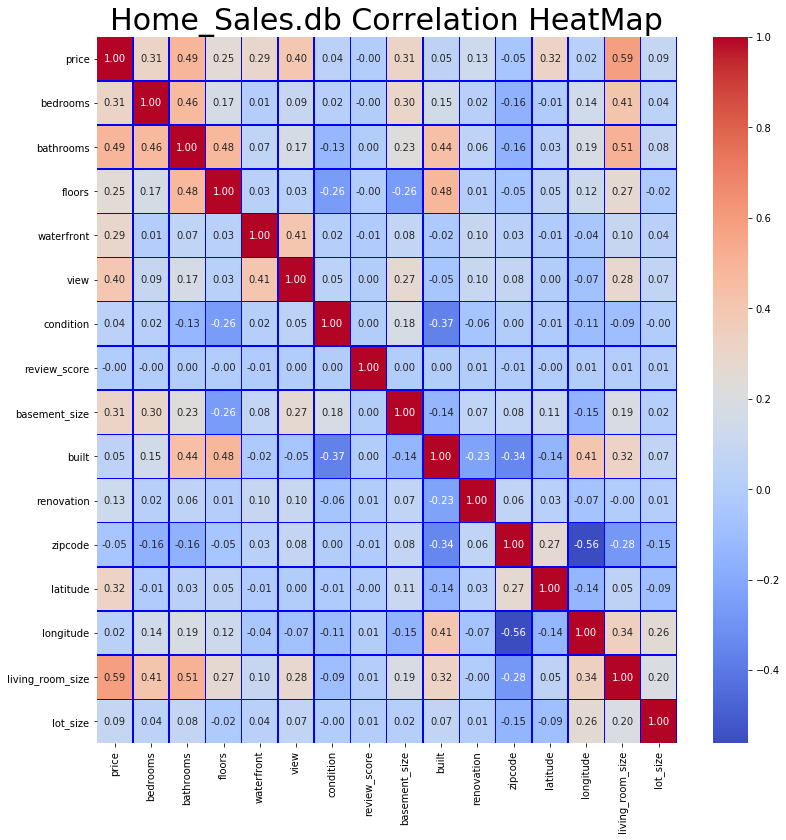

In [316]:
# Another way of doing it interestingly, instead of staring at boring figures, we can use nice graphical representation.
# To aid us in seeing the correlation, we can use a HeatMap to locate the correlation between the variables in this dataset. 

plt.subplots(figsize = (13,13)) # Sizing up of the Matplotlib figure.

sns.heatmap(df7.corr(),annot=True,linewidths=0.5,linecolor="Blue",fmt="1.2f",cmap='coolwarm') 
# Plot with seaborn. Black color border squares. Round up & show correlation index.

plt.title("Home_Sales.db Correlation HeatMap", fontsize = 30) # Name our HeatMap.

plt.show() # Display the Red Hot HeatMap! 
# Note : The darker the red color the more correlated it is. The darker the blue color the less correlated it will be.

# <font color = red>(4) <font size = 8>M</font>ODELLING DATA according to the <font color = blue>O.S.E.<font size = 8>M.</font>N.</font> Framework.</font>

In [ ]:
X = df7.drop(['price'], axis = 'columns') # Split data into features and target.

y = df7.price


